# Proyecto: Clasificación de Actividades

## Importación de DataFrame

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn as skl
import numpy as np
import scipy as sci

DIR='C:\Projects\Physical_activity_classifier/Smartphone_Dataset'

def data_extractor(DIR,data_size):
    x_data,y_data,error=[],[],[]
    Activities=['bike','climbing','descending','gymbike','jumping','running','standing','treadmill','walking']
    for suj in range(1,10):#######################10
        print('Extrayendo datos S0{}'.format(suj))
        for act in range(0,9):###################9
            for k in range(1,6):
                path=DIR+'/S0'+str(suj)+'/'+Activities[act]+str(k)+'.csv'
                try:
                    df=pd.read_csv(path,header=None)
                    data=df.as_matrix()
                    d_size=len(data)
                    groups=d_size//data_size
                    #print(groups)
                    new_data=[]
                    for g in range(0,groups):
                        d=data[g*data_size:(g+1)*data_size]
                        new_data.append(d)
                    for g in range(0,len(new_data)):
                        final_data=[]
                        sensors=[[],[],[],[],[],[],[],[],[]]
                        for i in range(0,data_size):
                            for j in range(0,9):
                                sensors[j].append(new_data[g][i][j])

                        for j in range(0,9):
                            final_data.append(np.mean(sensors[j]))#Mean
                            final_data.append(np.var(sensors[j]))#Var
                            final_data.append(np.min(sensors[j]))#Min
                            final_data.append(np.max(sensors[j]))#Max
                            final_data.append(np.max(sensors[j])-np.min(sensors[j]))#Range
                            RMS=0
                            for i in range(0,data_size):
                                RMS+=np.sqrt((1/d_size)*sensors[j][i]*sensors[j][i])
                            final_data.append(RMS)#RMS
                            final_data.append(sci.stats.kurtosis(sensors[j]))#Kurtosis

                        #-------------------Entropy----------------------
                        for j in range(0,9):
                            H=sci.stats.entropy(sensors[j])
                            #final_data.append(H)    
                        #-------------------EnergyExpenditure----------------------
                        for j in range(0,3):
                            EE=0
                            for i in range(0,data_size):
                                EE+=(1/d_size)*np.sqrt(sensors[0+j*3][i]*sensors[0+j*3][i]+sensors[1+j*3][i]*sensors[1+j*3][i]+sensors[2+j*3][i]*sensors[2+j*3][i])
                            final_data.append(EE)#EE
                            SMA=0
                            for i in range(0,data_size):
                                SMA+=(1/d_size)*(np.abs(sensors[0+j*3][i])+np.abs(sensors[1+j*3][i])+np.abs(sensors[2+j*3][i]))
                            final_data.append(SMA)#SMA    

                        x_data.append(final_data)
                        y_data.append(act)

                except FileNotFoundError :
                    estr=Activities[act]+str(k)
                    error.append(estr)
                    #print(path+' path doesn t exist')
    return x_data,y_data


In [2]:
x_data,y_data=data_extractor(DIR,500)
    
print('Cantidad de datos: {}'.format(len(x_data)))
print('Cantidad de caracteristicas: {}'.format(len(x_data[0])))
x,y=[],[]
x_train,y_train=[],[]
x_val,y_val=[],[]
x_test,y_test=[],[]

x,x_test,y,y_test=train_test_split(x_data,y_data,test_size=0.2,shuffle=True)

Extrayendo datos S01
Extrayendo datos S02
Extrayendo datos S03
Extrayendo datos S04
Extrayendo datos S05
Extrayendo datos S06
Extrayendo datos S07
Extrayendo datos S08
Extrayendo datos S09
Cantidad de datos: 383
Cantidad de caracteristicas: 69


In [7]:
sensor_names=['Ax','Ay','Az','Gx','Gy','Gz','Mx','My','Mz']
sensors_names=['Acc','Gyr','Mag']
features_names=[]
for j in range(0,9):
    features_names.append(sensor_names[j]+'Mean')
    features_names.append(sensor_names[j]+'Var')
    features_names.append(sensor_names[j]+'Min')
    features_names.append(sensor_names[j]+'Max')
    features_names.append(sensor_names[j]+'Range')
    features_names.append(sensor_names[j]+'RMS')
    features_names.append(sensor_names[j]+'Kurt')
for j in range(0,3):
    features_names.append(sensors_names[j]+'EE')
    features_names.append(sensors_names[j]+'SMA')
print(features_names)
print(len(features_names))
Activities=['bike','climbing','descending','gymbike','jumping','running','standing','treadmill','walking']

['AxMean', 'AxVar', 'AxMin', 'AxMax', 'AxRange', 'AxRMS', 'AxKurt', 'AyMean', 'AyVar', 'AyMin', 'AyMax', 'AyRange', 'AyRMS', 'AyKurt', 'AzMean', 'AzVar', 'AzMin', 'AzMax', 'AzRange', 'AzRMS', 'AzKurt', 'GxMean', 'GxVar', 'GxMin', 'GxMax', 'GxRange', 'GxRMS', 'GxKurt', 'GyMean', 'GyVar', 'GyMin', 'GyMax', 'GyRange', 'GyRMS', 'GyKurt', 'GzMean', 'GzVar', 'GzMin', 'GzMax', 'GzRange', 'GzRMS', 'GzKurt', 'MxMean', 'MxVar', 'MxMin', 'MxMax', 'MxRange', 'MxRMS', 'MxKurt', 'MyMean', 'MyVar', 'MyMin', 'MyMax', 'MyRange', 'MyRMS', 'MyKurt', 'MzMean', 'MzVar', 'MzMin', 'MzMax', 'MzRange', 'MzRMS', 'MzKurt', 'AccEE', 'AccSMA', 'GyrEE', 'GyrSMA', 'MagEE', 'MagSMA']
69


In [8]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = 100 * cm / cm.sum(1)
    plt.figure(figsize=(10,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.0f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
import time
def NN_train(xdata,ydata,hl_size=10,act='relu'):
    clf = MLPClassifier(activation=act,solver='lbfgs', hidden_layer_sizes=hl_size,
    early_stopping = True, validation_fraction = 0.25);
    
    xtrain,xval,ytrain,yval=train_test_split(xdata,ydata,random_state=clf.random_state,
                                                       test_size=clf.validation_fraction)
    clf.fit(xdata, np.ravel(ydata))
    return [clf,xtrain,xval,ytrain,yval]

def NN(x,y,hl_s):
    print('-------------------------------------------------')
    print('Neural Network')
    print('-------------------------------------------------')
    best_cm=None
    best_acc,best_hls=0,0
    for i in range(0,len(hl_s)):
        clf,x_train,x_val,y_train,y_val=NN_train(x,y,hl_size=hl_s[i])
        y_pred=clf.predict(x_val)
        c_m=confusion_matrix(np.ravel(y_val), y_pred)
        acc=accuracy_score(y_val, y_pred)
        if acc>best_acc:
            best_acc=acc
            best_cm=c_m
            best_hls=hl_s[i]
    title='Matriz de Confusión Red Neuronal con '+str(best_hls)+ ' neuronas'
    #print('Tiempo de entrenamiento: {}s'.format(dt))
    plot_confusion_matrix(best_cm,Activities,normalize=False,title=title)
    print('Mejor configuración: Tamaño capa oculta {}'.format(best_hls))
    print('Clasificaciones exitosas: {}%'.format(best_acc*100))
    return x_train,x_val,y_train,y_val

def svm_poly(x_train,y_train,x_test,y_test,degs=[1]):
    best_cm=None
    best_acc,best_deg=0,0
    for i in range(0,len(degs)):
        clf = SVC(kernel='poly',degree=degs[i])
        clf.fit(x_train, y_train)  
        y_pred=clf.predict(x_test)
        c_m=confusion_matrix(np.ravel(y_test), y_pred)
        acc=accuracy_score(np.ravel(y_test), y_pred)
        if acc>best_acc:
            best_acc=acc
            best_cm=c_m
            best_deg=degs[i]
    
    print('-------------------------------------------------')
    print('Support Vector Machine')
    print('-------------------------------------------------')
    title='Matriz de Confusión SVM con kernel polinomial grado '+str(best_deg)
    plot_confusion_matrix(best_cm,Activities,title=title)
    print('Mejor configuración: Polinomio Grado {}'.format(best_deg))
    print('Clasificaciones exitosas: {}%'.format(acc*100))

def NB(x_train,y_train,x_val,y_val):
    clf = GaussianNB().fit(x_train, y_train)
    y_pred=clf.predict(x_val_n)
    c_m=confusion_matrix(np.ravel(y_val), y_pred)
    acc=accuracy_score(np.ravel(y_val), y_pred)
    print('-------------------------------------------------')
    print('Gaussian Naive Bayes')
    print('-------------------------------------------------')
    title='Matriz de Confusión Clasificador Naive Bayes Gaussiano'
    plot_confusion_matrix(c_m,Activities,title=title)
    print('Clasificaciones exitosas: {}%'.format(acc*100))

## Redes Neuronales

-------------------------------------------------
Neural Network
-------------------------------------------------
Mejor configuración: Tamaño capa oculta 500
Clasificaciones exitosas: 97.40259740259741%
-------------------------------------------------
Support Vector Machine
-------------------------------------------------
Mejor configuración: Polinomio Grado 1
Clasificaciones exitosas: 68.83116883116884%
-------------------------------------------------
Gaussian Naive Bayes
-------------------------------------------------
Clasificaciones exitosas: 83.11688311688312%


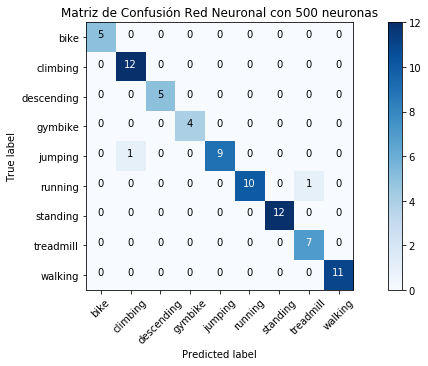

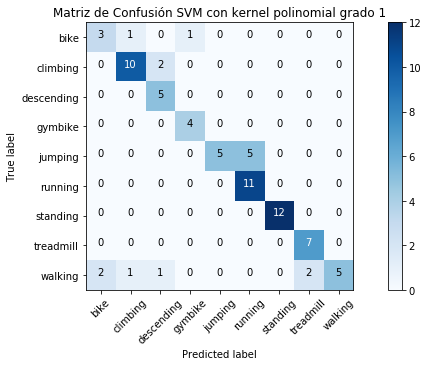

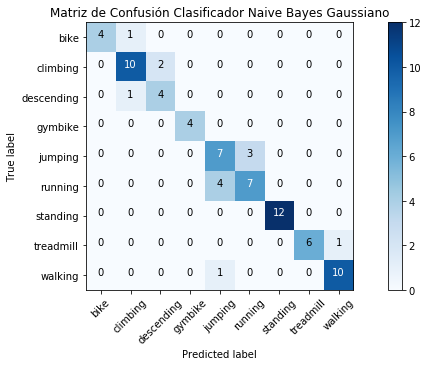

In [10]:
hl_s=[10,50,100,500] #hl_size_op=5000#(28+10)//2
x_train,x_val,y_train,y_val=NN(x,y,hl_s)

std_scale=skl.preprocessing.StandardScaler().fit(x_train)
x_train_n = std_scale.transform(x_train)
x_val_n = std_scale.transform(x_val)

degs=[1,2,3]
svm_poly(x_train_n,y_train,x_val_n,y_val,degs)

NB(x_train_n,y_train,x_val_n,y_val)

## Selección de características

feature size: 69 ---> 30


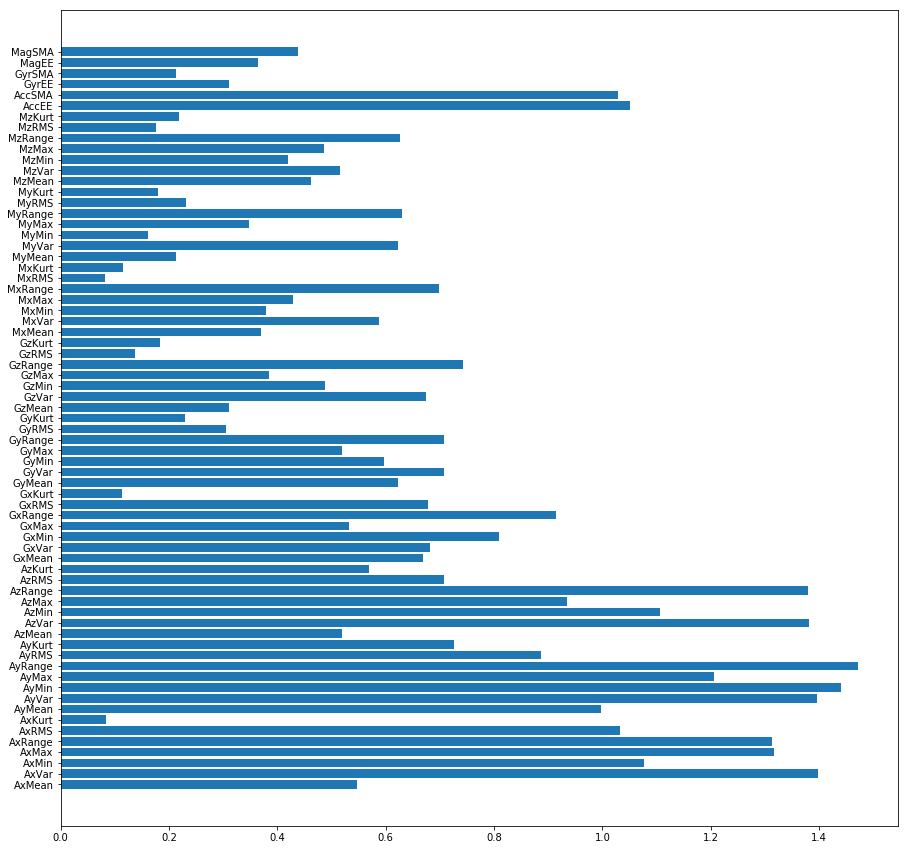

In [11]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
sel = SelectKBest(score_func=mutual_info_classif,k=30).fit(x_train, y_train)
x2= sel.transform(x)
print('feature size: {} ---> {}'.format(len(x[0]),len(x2[0])))
scores=sel.scores_
feature_s=len(x[0])
features=np.arange(0,feature_s,1)
plt.figure(figsize=(15,15))
plt.barh(range(feature_s),scores)
plt.yticks(range(feature_s),features_names)
plt.show()

-------------------------------------------------
Neural Network
-------------------------------------------------
Mejor configuración: Tamaño capa oculta 100
Clasificaciones exitosas: 98.7012987012987%
-------------------------------------------------
Support Vector Machine
-------------------------------------------------
Mejor configuración: Polinomio Grado 1
Clasificaciones exitosas: 55.84415584415584%
-------------------------------------------------
Gaussian Naive Bayes
-------------------------------------------------
Clasificaciones exitosas: 76.62337662337663%


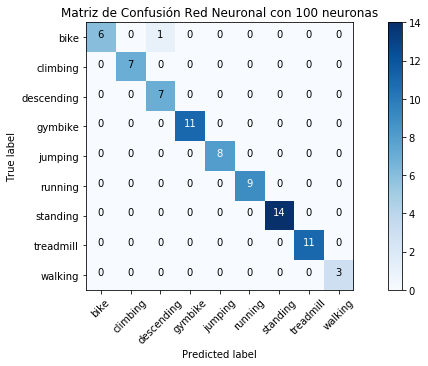

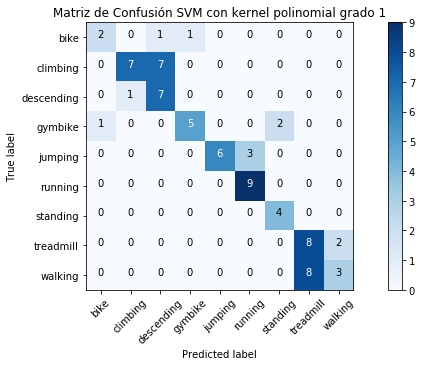

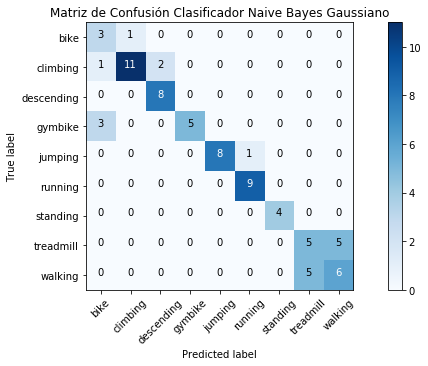

In [12]:
x_train,x_val,y_train,y_val=NN(x2,y,hl_s)

std_scale=skl.preprocessing.StandardScaler().fit(x_train)
x_train_n = std_scale.transform(x_train)
x_val_n = std_scale.transform(x_val)

svm_poly(x_train_n,y_train,x_val_n,y_val,degs)
NB(x_train_n,y_train,x_val_n,y_val)

## Tercera Selección de Caracteríticas

In [13]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
sel = SelectKBest(score_func=mutual_info_classif,k=10).fit(x_train, y_train)
x3= sel.transform(x2)
print('feature size: {} ---> {}'.format(len(x2[0]),len(x3[0])))
scores=sel.scores_
feature_s=len(x2[0])
features=np.arange(0,feature_s,1)

feature size: 30 ---> 10


-------------------------------------------------
Neural Network
-------------------------------------------------
Mejor configuración: Tamaño capa oculta 50
Clasificaciones exitosas: 85.71428571428571%
-------------------------------------------------
Support Vector Machine
-------------------------------------------------
Mejor configuración: Polinomio Grado 1
Clasificaciones exitosas: 55.84415584415584%
-------------------------------------------------
Gaussian Naive Bayes
-------------------------------------------------
Clasificaciones exitosas: 77.92207792207793%


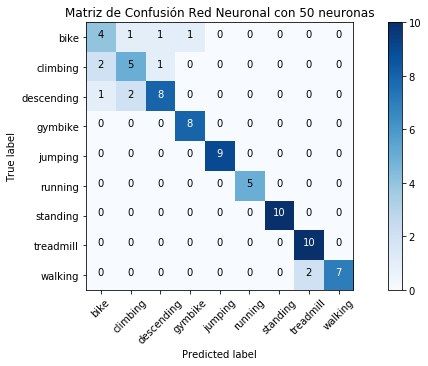

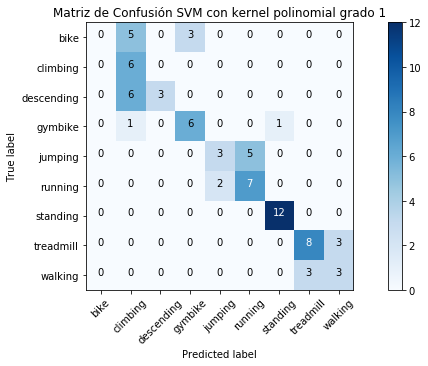

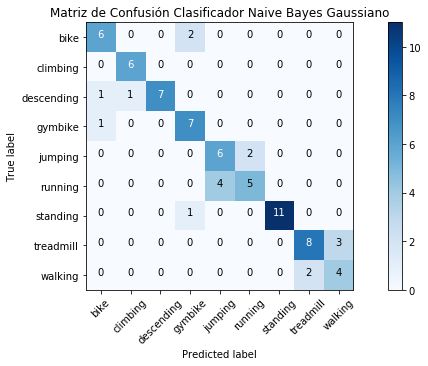

In [14]:
x_train,x_val,y_train,y_val=NN(x3,y,hl_s)

std_scale=skl.preprocessing.StandardScaler().fit(x_train)
x_train_n = std_scale.transform(x_train)
x_val_n = std_scale.transform(x_val)

svm_poly(x_train_n,y_train,x_val_n,y_val,degs)
NB(x_train_n,y_train,x_val_n,y_val)

# Extracción de Datos (tamaño 250)

In [15]:
x_data,y_data=data_extractor(DIR,250)
    
print('Cantidad de datos: {}'.format(len(x_data)))
print('Cantidad de caracteristicas: {}'.format(len(x_data[0])))
x,y=[],[]
x_train,y_train=[],[]
x_val,y_val=[],[]
x_test,y_test=[],[]

x,x_test,y,y_test=train_test_split(x_data,y_data,test_size=0.2,shuffle=True)

Extrayendo datos S01
Extrayendo datos S02
Extrayendo datos S03
Extrayendo datos S04
Extrayendo datos S05
Extrayendo datos S06
Extrayendo datos S07
Extrayendo datos S08
Extrayendo datos S09
Cantidad de datos: 766
Cantidad de caracteristicas: 69


-------------------------------------------------
Neural Network
-------------------------------------------------
Mejor configuración: Tamaño capa oculta 500
Clasificaciones exitosas: 98.0392156862745%
-------------------------------------------------
Support Vector Machine
-------------------------------------------------
Mejor configuración: Polinomio Grado 1
Clasificaciones exitosas: 79.08496732026144%
-------------------------------------------------
Gaussian Naive Bayes
-------------------------------------------------
Clasificaciones exitosas: 88.88888888888889%


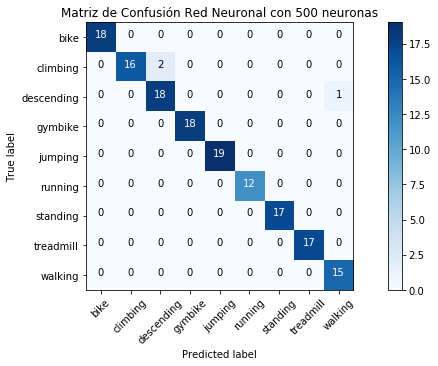

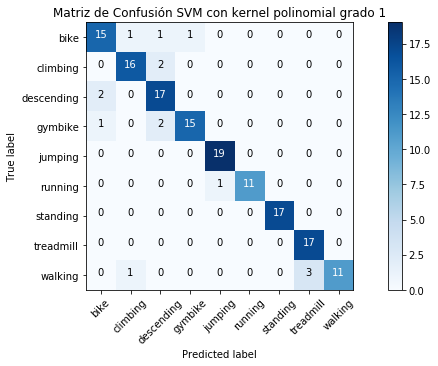

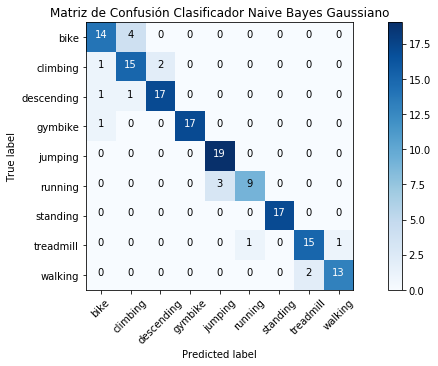

In [16]:
hl_s=[10,50,100,500] #hl_size_op=5000#(28+10)//2
x_train,x_val,y_train,y_val=NN(x,y,hl_s)

std_scale=skl.preprocessing.StandardScaler().fit(x_train)
x_train_n = std_scale.transform(x_train)
x_val_n = std_scale.transform(x_val)

degs=[1,2,3]
svm_poly(x_train_n,y_train,x_val_n,y_val,degs)

NB(x_train_n,y_train,x_val_n,y_val)

feature size: 69 ---> 30


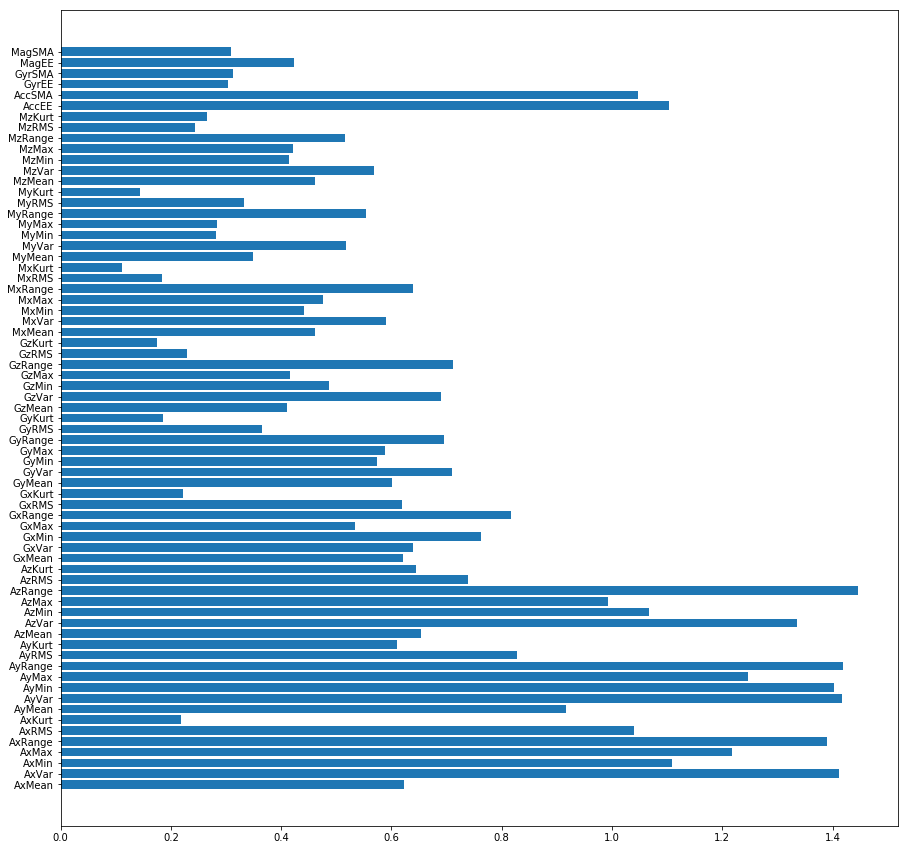

In [17]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
sel = SelectKBest(score_func=mutual_info_classif,k=30).fit(x_train, y_train)
x2= sel.transform(x)
print('feature size: {} ---> {}'.format(len(x[0]),len(x2[0])))
scores=sel.scores_
feature_s=len(x[0])
features=np.arange(0,feature_s,1)
plt.figure(figsize=(15,15))
plt.barh(range(feature_s),scores)
plt.yticks(range(feature_s),features_names)
plt.show()

-------------------------------------------------
Neural Network
-------------------------------------------------
Mejor configuración: Tamaño capa oculta 100
Clasificaciones exitosas: 97.38562091503267%
-------------------------------------------------
Support Vector Machine
-------------------------------------------------
Mejor configuración: Polinomio Grado 1
Clasificaciones exitosas: 69.93464052287581%
-------------------------------------------------
Gaussian Naive Bayes
-------------------------------------------------
Clasificaciones exitosas: 84.31372549019608%


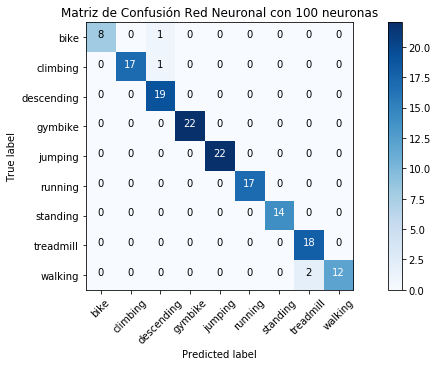

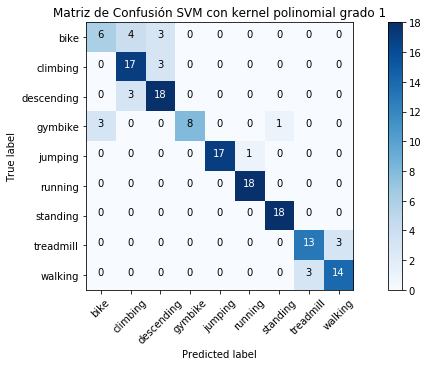

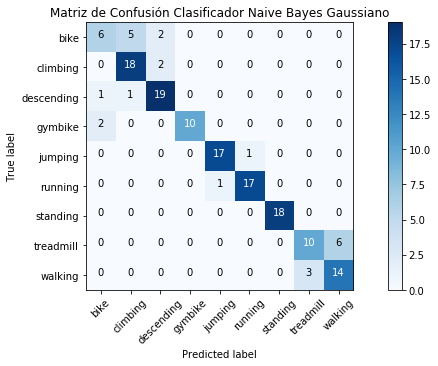

In [18]:
x_train,x_val,y_train,y_val=NN(x2,y,hl_s)

std_scale=skl.preprocessing.StandardScaler().fit(x_train)
x_train_n = std_scale.transform(x_train)
x_val_n = std_scale.transform(x_val)

svm_poly(x_train_n,y_train,x_val_n,y_val,degs)
NB(x_train_n,y_train,x_val_n,y_val)

# Extracción de Datos (tamaño 100)

In [19]:
x_data,y_data=data_extractor(DIR,100)
    
print('Cantidad de datos: {}'.format(len(x_data)))
print('Cantidad de caracteristicas: {}'.format(len(x_data[0])))
x,y=[],[]
x_train,y_train=[],[]
x_val,y_val=[],[]
x_test,y_test=[],[]

x,x_test,y,y_test=train_test_split(x_data,y_data,test_size=0.2,shuffle=True)

Extrayendo datos S01
Extrayendo datos S02
Extrayendo datos S03
Extrayendo datos S04
Extrayendo datos S05
Extrayendo datos S06
Extrayendo datos S07
Extrayendo datos S08
Extrayendo datos S09
Cantidad de datos: 1915
Cantidad de caracteristicas: 69


-------------------------------------------------
Neural Network
-------------------------------------------------
Mejor configuración: Tamaño capa oculta 500
Clasificaciones exitosas: 98.9556135770235%
-------------------------------------------------
Support Vector Machine
-------------------------------------------------
Mejor configuración: Polinomio Grado 1
Clasificaciones exitosas: 89.55613577023499%
-------------------------------------------------
Gaussian Naive Bayes
-------------------------------------------------
Clasificaciones exitosas: 90.86161879895562%


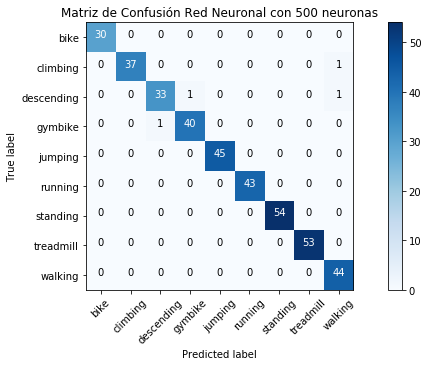

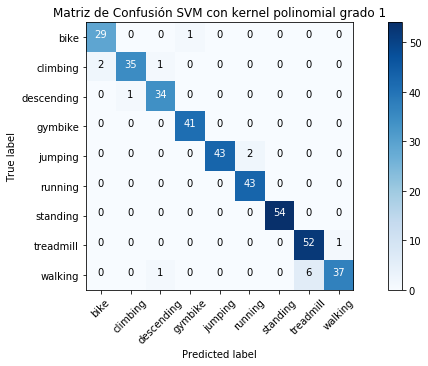

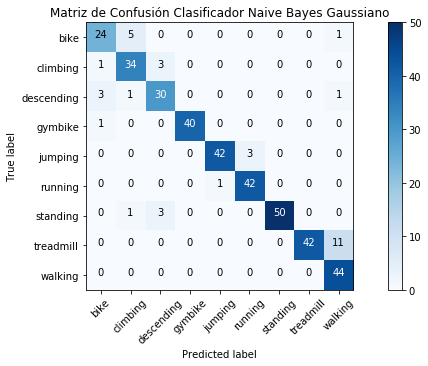

In [20]:
hl_s=[10,50,100,500] #hl_size_op=5000#(28+10)//2
x_train,x_val,y_train,y_val=NN(x,y,hl_s)

std_scale=skl.preprocessing.StandardScaler().fit(x_train)
x_train_n = std_scale.transform(x_train)
x_val_n = std_scale.transform(x_val)

degs=[1,2,3]
svm_poly(x_train_n,y_train,x_val_n,y_val,degs)

NB(x_train_n,y_train,x_val_n,y_val)